# **UNIVERSIDAD AUTONOMA DE OCCIDENTE**
## **Especialización en Analítica de Big Data**
### **Módulo: Gestión y Almacenamiento de Datos**
### **Proyecto de Extracción y Transformación de Datos para Análisis**
### **<font>Autores:**
- **Sergio Masso Giiraldo**
- **Daniel Otero Erazo**
- **Alejandro Parra Palacios**
</font>

In [1]:
# ! pip install spotipy

## Importe de librerias
---
En esta sección importamos todas las librerías que vayamos a utilizar para poder realizar la extracción y transformación de la data, cumpliendo parte del proceso de ETL en ETL.

In [2]:
import pandas as pd # Liberia para manipular y analizar datos
import matplotlib.pyplot as plt # Libreria para visualizar
import seaborn as sns # Libreria para visualizar
import numpy as np # Liberia para operaciones numéricas
import plotly.graph_objects as go # Liberia para visualizaciones mas interactivas
import plotly.offline as pyo
import matplotlib.ticker as mtick # Función para formatear funciones
from matplotlib.colors import LinearSegmentedColormap # Funcion para poder cambiar de color la linea de segmento del mapa de calor
from scipy.stats import skew, kurtosis # Funciones estadísticas
import spotipy # Libreria para la conexion con la api de spotify
from spotipy.oauth2 import SpotifyClientCredentials # De la liberias importamos otra liberia para poder acceder a las credenciales generadas por el token
from math import pi
import mysql.connector
from sqlalchemy import create_engine

import warnings

## Acceso a la API de Spotify
---
Debemos obtener las credenciales para acceder a la API de <a href = 'https://open.spotify.com/'>Spotify</a> que nos permitirá extraer data de la plataforma. Para ello es necesario crearse una cuenta en <a href = 'https://developer.spotify.com/dashboard/'>Spotify for Developers</a> y darle al botón verde "Create an app". Para mucha más información utilizamos parte de la documentación de Python con Spotify <a href = 'https://spotipy.readthedocs.io/en/2.22.1/'>(Spotipy)</a> para tener más soporte de cómo hacer la extracción.

In [3]:
# Credenciales de aceeso
client_id = "139824c906db4dc887f85935a915637b"
client_secret = "af879adc779a4fedaa61a78d9c71cb8c"

# Autentication
client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Extraccion de los datos
---
Una vez ya conectados con la API de Spotify, para este caso sacaremos información acorde a las canciones más top o escuchadas para `Colombia`; en el cual analizaremos cómo se comportan los géneros, artistas, y algunas de las variables que componen las canciones; esto de por entender un poco de cómo es el comportamiento musical acorde a lo que más escuchan los colombianos.

Para la extraccion esta se dividira en tres partes:

- Información de las canciones (tracks).
- Información sobre los artistas que interpretan las canciones (tracks).
- Informacion de las variables numéricas de las canciones (tracks).

### Información de las canciones (tracks)

Extraemos la información frente a las canciones más escuchadas para `Colombia`.

In [4]:
# Market seleccionado para Colombia
location_track_id = ['37i9dQZEVXbOa2lmxNORXQ', '3lnMwmYF979bEedMa6WK38', '6h6uzoRBXnkjeoEjwiX27R', '4iO38S6DrNG8yqj8waeuYL','7L8zRmRs5mdeFsnnezx5TV', '5CrQnEipwoaNtUHAqAGb8j', '37i9dQZF1DX60RwvNpUvFR',
                     '3G96vOweREGK5xctcorYCK', '37i9dQZF1DX3n6AX7VnjLA', '37i9dQZF1DXbvPjXfc8G9S', '2cSuhO8QoDA3lQwAIysWeq', '37i9dQZF1DWVCwysuouxGp', '37i9dQZF1DX4kIq9fonR5J', '37i9dQZF1DX7cQIWrmrWbE',
                     '47eKkZDgUINMlBXiVTMxK9', '37i9dQZF1DX9cp1suxagma', '6vmzy0JgrPycyhLVrYfoSu', '1ThkSGVjKOXaqC7F3kLPgX', '55JmVoIBkkGAllWNzmISTk', '5xy3SmnJJBadxtPBztom26', '0awvnocTEnF0tnckORhDgg',
                     '5MscKjDUaQxCkex6xO5uaW', '75tY7KaoZfczKF8PLmyETH', '55g0mATNGRgWEZuBq5KYZ8', '37i9dQZF1EIfctQTk0Ol0y', '41K6jx42E54zAKXfzgXfGt', '66iyhNy5Oe35SJfM8bXiPV', '5l3NKJfikB2IKKiu9f5Nle',
                     '2moGBchxawu9eNHJq0wvx5', '2moGBchxawu9eNHJq0wvx5', '37i9dQZF1DX5UTavgI6ivn']

# Lista para guardar informacion
consolidated_tracks_data = []

# Conjunto para validar y no tener duplicados
track_ids_seen = set()

# Extraccion de los datos
for i in location_track_id:
    tracks = sp.playlist_tracks(i)

    # Validacion para no generar duplicados
    for item in tracks['items']:
        if item['track']:
            track = item['track']
            track_id = track['id']

            if track_id in track_ids_seen:
                continue

            track_ids_seen.add(track_id)

            # Almacenamiento de la data recorrida a la lista
            track_info = {
                'artista_id': track['artists'][0]['id'],
                'nombre_artista': track['artists'][0]['name'],
                'id_cancion':track['id'],
                'nombre_cancion': track['name'],
                'popularidad': track['popularity']
            }
            consolidated_tracks_data.append(track_info)

# Creo un DataFrame con la data recopilada
df_tracks = pd.DataFrame(consolidated_tracks_data)

In [5]:
# Muestra de como queda el DataFrame
df_tracks.head()

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,LUNA,94
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,SI SABE FERXXO,84
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,PERRO NEGRO,91
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,94
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según Quién,87


In [6]:
# Cambiamos caligrafia del nombre de las canciones
df_tracks['nombre_cancion'] = df_tracks['nombre_cancion'].str.capitalize()

In [7]:
# Eliminamos algunos duplicados
df_tracks = df_tracks.drop_duplicates(subset = 'nombre_cancion', keep = 'first')
df_tracks

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87
...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62
1698,1zo2ucFhzu58hKcniMpSQs,Soley,1hF43vYDCkaqiclywCXkGp,Todos mienten,48
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,1k94CNfVliqDs0qYhkG8iV,12x3,71


### Información sobre la canciones (tracks)

Vamos a traer la información acorde a las imágenes que tiene el track, para después utilizarla en los gráficos.

In [8]:
# Lista para guardar las URLs de las imágenes del álbum de las canciones
imagenes_album_url = []

for id_c in df_tracks.id_cancion:
    track_details = sp.track(id_c) # # Obtiene los detalles del track usando el ID del track
    album_images = track_details['album']['images']

    # Selecciona la primera imagen (la más grande) si hay imágenes disponibles
    if album_images:
        imagen_url = album_images[0]['url']
    else:
        imagen_url = None # O alguna URL de imagen por defecto si prefieres
    
    imagenes_album_url.append(imagen_url)

In [9]:
# Añadimos la lista de URLs de imágenes al DataFrame
df_tracks['imagen_album_url'] = imagenes_album_url

### Información sobre los artistas que interpretan las canciones (tracks)

Agregamos información sobre los artistas que interpretan las canciones, como sus seguidores, los generos donde se desenvuelve, etc.

In [10]:
# Listas para nueva informacion
popularidad_artista = []
generos_artista = []
seguidores_artista = []

# Extraccion de los datos para artistas
for id_a in df_tracks.artista_id:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [11]:
# Agremos la informacion al DataFrame
df_tracks = df_tracks.assign(popularidad_artista = popularidad_artista, generos_artista = generos_artista, seguidores_artista = seguidores_artista)
df_tracks.head()

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455


### Informacion de las variables numéricas de las canciones (tracks)

Extraemos la información sobre algunas variables que componen las canciones, como es la duración, tempo de la canción; todos aquellos componentes musicales.

In [12]:
# Listas para nueva informacion
variables_cancion = []

# Extraccion de variables
for x in df_tracks['id_cancion']:
  af = sp.audio_features(x)
  variables_cancion.append(af)

In [13]:
# Imprimimos las llaves que generan del json de la informacion
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [14]:
# Muestra de la informacion en json
variables_cancion

[[{'danceability': 0.774,
   'energy': 0.86,
   'key': 7,
   'loudness': -2.888,
   'mode': 0,
   'speechiness': 0.13,
   'acousticness': 0.131,
   'instrumentalness': 0,
   'liveness': 0.116,
   'valence': 0.446,
   'tempo': 100.019,
   'type': 'audio_features',
   'id': '7bywjHOc0wSjGGbj04XbVi',
   'uri': 'spotify:track:7bywjHOc0wSjGGbj04XbVi',
   'track_href': 'https://api.spotify.com/v1/tracks/7bywjHOc0wSjGGbj04XbVi',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7bywjHOc0wSjGGbj04XbVi',
   'duration_ms': 196800,
   'time_signature': 4}],
 [{'danceability': 0.726,
   'energy': 0.831,
   'key': 8,
   'loudness': -2.035,
   'mode': 0,
   'speechiness': 0.12,
   'acousticness': 0.0139,
   'instrumentalness': 3.71e-06,
   'liveness': 0.0891,
   'valence': 0.489,
   'tempo': 95.997,
   'type': 'audio_features',
   'id': '7chTH3GBjjAyagf0SPCZDL',
   'uri': 'spotify:track:7chTH3GBjjAyagf0SPCZDL',
   'track_href': 'https://api.spotify.com/v1/tracks/7chTH3GBjjAyagf0SPCZDL',


In [15]:
# Extraemos la informacion que se encuentra en sublista
datos_corregidos = []

for x in variables_cancion:
    for y in x:
        datos_corregidos.append(y)

In [16]:
# Convetimos la informacion en un DataFrame
df_variables = pd.DataFrame(datos_corregidos)
df_variables

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.774,0.860,7,-2.888,0,0.1300,0.13100,0.000000,0.1160,0.446,100.019,audio_features,7bywjHOc0wSjGGbj04XbVi,spotify:track:7bywjHOc0wSjGGbj04XbVi,https://api.spotify.com/v1/tracks/7bywjHOc0wSj...,https://api.spotify.com/v1/audio-analysis/7byw...,196800,4
1,0.726,0.831,8,-2.035,0,0.1200,0.01390,0.000004,0.0891,0.489,95.997,audio_features,7chTH3GBjjAyagf0SPCZDL,spotify:track:7chTH3GBjjAyagf0SPCZDL,https://api.spotify.com/v1/tracks/7chTH3GBjjAy...,https://api.spotify.com/v1/audio-analysis/7chT...,152500,4
2,0.911,0.778,5,-2.248,1,0.2620,0.08870,0.000022,0.1790,0.345,96.057,audio_features,7iQXYTyuG13aoeHxGG28Nh,spotify:track:7iQXYTyuG13aoeHxGG28Nh,https://api.spotify.com/v1/tracks/7iQXYTyuG13a...,https://api.spotify.com/v1/audio-analysis/7iQX...,162768,4
3,0.751,0.819,11,-4.372,0,0.0409,0.25500,0.000000,0.2360,0.697,131.842,audio_features,0R6NfOiLzLj4O5VbYSJAjf,spotify:track:0R6NfOiLzLj4O5VbYSJAjf,https://api.spotify.com/v1/tracks/0R6NfOiLzLj4...,https://api.spotify.com/v1/audio-analysis/0R6N...,172264,3
4,0.909,0.762,9,-3.974,1,0.0643,0.43400,0.000000,0.0856,0.843,101.987,audio_features,4bw8mcDUSRWfQo63ZTYRnU,spotify:track:4bw8mcDUSRWfQo63ZTYRnU,https://api.spotify.com/v1/tracks/4bw8mcDUSRWf...,https://api.spotify.com/v1/audio-analysis/4bw8...,142335,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.715,0.622,4,-5.102,0,0.0460,0.16300,0.000000,0.0948,0.808,80.015,audio_features,2rCbl9naJYhaxjLsfx88uM,spotify:track:2rCbl9naJYhaxjLsfx88uM,https://api.spotify.com/v1/tracks/2rCbl9naJYha...,https://api.spotify.com/v1/audio-analysis/2rCb...,195053,4
1509,0.563,0.877,1,-2.082,0,0.1200,0.02930,0.000000,0.0749,0.646,93.832,audio_features,6f4UPdDBQONKJBRqwZGjaJ,spotify:track:6f4UPdDBQONKJBRqwZGjaJ,https://api.spotify.com/v1/tracks/6f4UPdDBQONK...,https://api.spotify.com/v1/audio-analysis/6f4U...,209033,4
1510,0.816,0.791,8,-4.053,0,0.2480,0.16100,0.000000,0.0967,0.843,97.501,audio_features,1hF43vYDCkaqiclywCXkGp,spotify:track:1hF43vYDCkaqiclywCXkGp,https://api.spotify.com/v1/tracks/1hF43vYDCkaq...,https://api.spotify.com/v1/audio-analysis/1hF4...,384000,4
1511,0.868,0.729,2,-4.955,1,0.1170,0.00107,0.000090,0.2440,0.613,93.989,audio_features,1k94CNfVliqDs0qYhkG8iV,spotify:track:1k94CNfVliqDs0qYhkG8iV,https://api.spotify.com/v1/tracks/1k94CNfVliqD...,https://api.spotify.com/v1/audio-analysis/1k94...,159200,4


## Tranformacion de datos
---
Frente a la data extraída, realizaremos una transformación de esta, con el fin de poder tener el tipo de variable correcta para poder hacer el análisis.

In [17]:
# Cambiamos la variable por tipo numerica y eliminamos columas que no vamos a utilizatr
df_variables['duration_ms'] = pd.to_numeric(df_variables['duration_ms'])
df_variables = df_variables.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])

In [18]:
# Muestra de informacion de los DataFrames
print(f'{df_tracks.info()}\n')
print(df_variables.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   artista_id           1513 non-null   object
 1   nombre_artista       1513 non-null   object
 2   id_cancion           1513 non-null   object
 3   nombre_cancion       1513 non-null   object
 4   popularidad          1513 non-null   int64 
 5   imagen_album_url     1513 non-null   object
 6   popularidad_artista  1513 non-null   int64 
 7   generos_artista      1513 non-null   object
 8   seguidores_artista   1513 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 118.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1513 non-null   float64
 1   energy            1513 non-null   float64
 2   lo

In [19]:
# Cambiamos el tipo de variable
df_tracks['nombre_artista'] = df_tracks['nombre_artista'].astype("string")
df_tracks['nombre_cancion'] = df_tracks['nombre_cancion'].astype("string")
df_tracks['id_cancion'] = df_tracks['id_cancion'].astype("string")
df_tracks['artista_id'] = df_tracks['artista_id'].astype("string")
df_variables['instrumentalness'] = pd.to_numeric(df_variables['instrumentalness'])
df_variables['time_signature'] = df_variables['time_signature'].astype("category")

# Muestra de informacion de los DataFrames
print(f'{df_tracks.info()}\n')
print(df_variables.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   artista_id           1513 non-null   string
 1   nombre_artista       1513 non-null   string
 2   id_cancion           1513 non-null   string
 3   nombre_cancion       1513 non-null   string
 4   popularidad          1513 non-null   int64 
 5   imagen_album_url     1513 non-null   object
 6   popularidad_artista  1513 non-null   int64 
 7   generos_artista      1513 non-null   object
 8   seguidores_artista   1513 non-null   int64 
dtypes: int64(3), object(2), string(4)
memory usage: 118.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1513 non-null   float64 
 1   energy            1513 non-null   f

## Análisis Exploratorio de los Datos
---
Con base a la información extraída, se realizará un análisis exploratorio de los datos proporcionados por la API de Spotify para identificar tendencias y patrones relevantes.

### Canciones, artistas y géneros más populares en `Colombia`

In [20]:
# Muestra del DataFrame
df_tracks

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70,https://i.scdn.co/image/ab67616d0000b273ee3c93...,80,"[colombian pop, latin pop, reggaeton, reggaeto...",22160978
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62,https://i.scdn.co/image/ab67616d0000b2733782a8...,66,"[colombian pop, vallenato, vallenato moderno]",4566007
1698,1zo2ucFhzu58hKcniMpSQs,Soley,1hF43vYDCkaqiclywCXkGp,Todos mienten,48,https://i.scdn.co/image/ab67616d0000b273272937...,45,[],41316
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,1k94CNfVliqDs0qYhkG8iV,12x3,71,https://i.scdn.co/image/ab67616d0000b2733d330a...,60,"[reggaeton colombiano, urbano latino]",557169


In [21]:
top_canciones = df_tracks.sort_values(by = ['popularidad'], ascending = False)[['nombre_cancion', 'nombre_artista', 'popularidad']].head(20)
top_canciones.index = np.arange(1, len(top_canciones) + 1)
top_canciones

,nombre_cancion,nombre_artista,popularidad
1,Beautiful things,Benson Boone,100
2,End of beginning,Djo,98
3,Greedy,Tate McRae,96
4,Gata only,FloyyMenor,94
5,Luna,Feid,94
6,La diabla,Xavi,94
7,Redrum,21 Savage,93
8,La falda,Myke Towers,92
9,Unwritten,Natasha Bedingfield,92
10,Flowers,Miley Cyrus,91


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

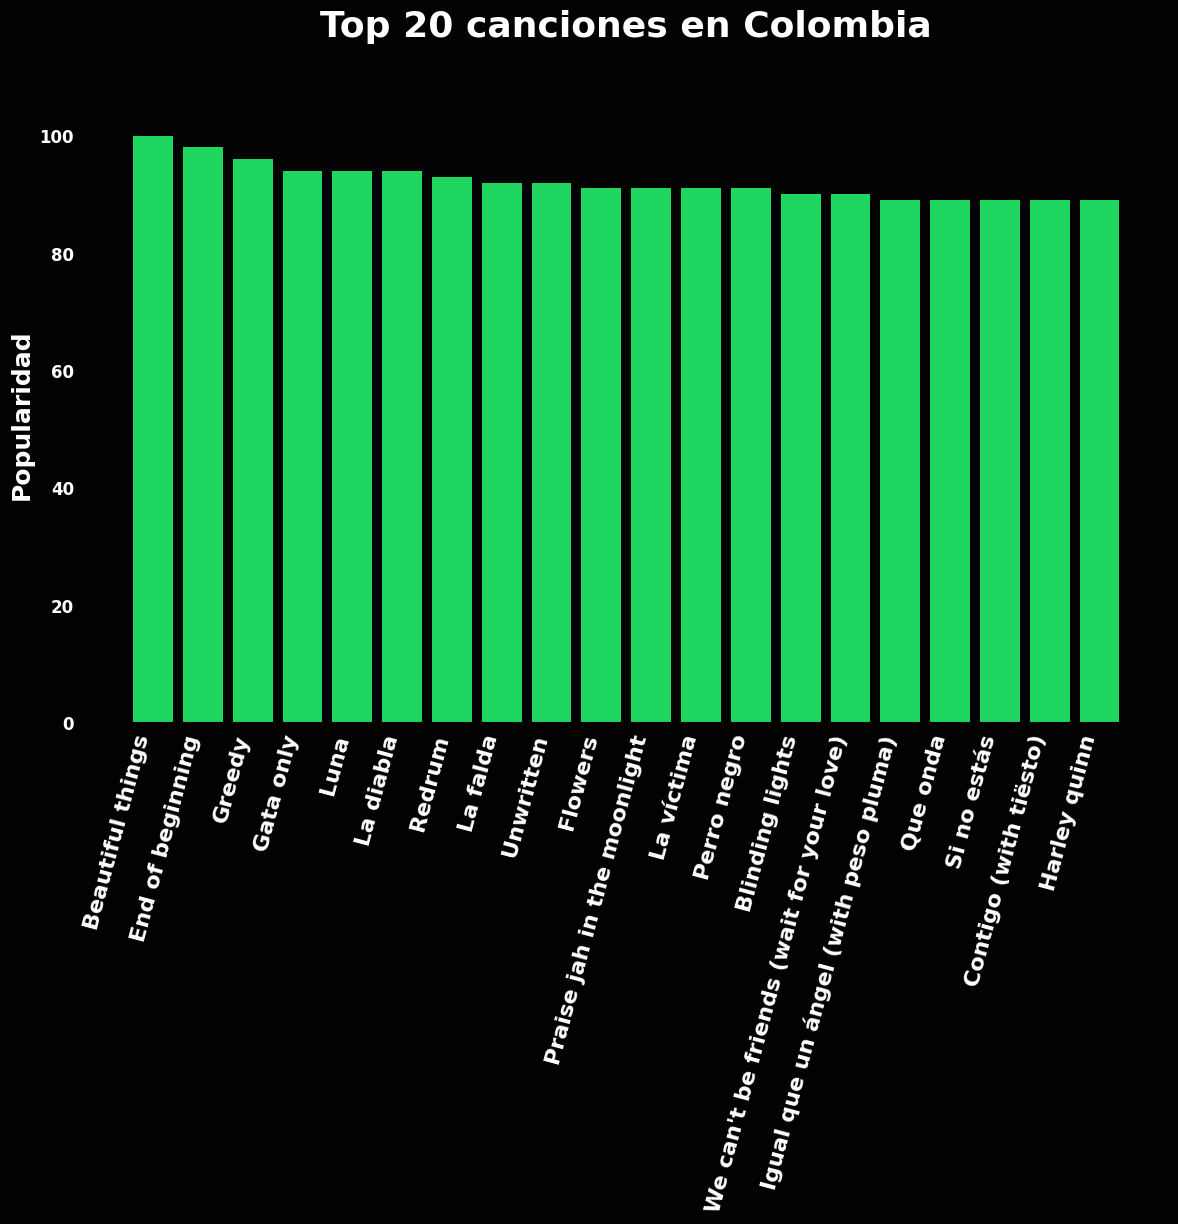

In [22]:
# Grafica de barras de canciones top en Colombia
plt.figure(figsize=(14,8), facecolor='#020202')
ax = plt.axes()
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top 20 canciones en Colombia", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

### Artistas más populares según número de seguidores para `Colombia`

In [23]:
top_artistas = pd.DataFrame(df_tracks.sort_values(by = ['seguidores_artista'], ascending = False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas) + 1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Ed Sheeran,113546865,87,"['pop', 'singer-songwriter pop', 'uk pop']"
2,Ariana Grande,95508427,95,['pop']
3,Billie Eilish,92966323,88,"['art pop', 'pop']"
4,Drake,85994585,96,"['canadian hip hop', 'canadian pop', 'hip hop'..."
5,The Weeknd,81300458,95,"['canadian contemporary r&b', 'canadian pop', ..."
6,Bad Bunny,79872204,95,"['reggaeton', 'trap latino', 'urbano latino']"
7,BTS,72202767,87,"['k-pop', 'k-pop boy group', 'pop']"
8,Rihanna,59060034,90,"['barbadian pop', 'pop', 'urban contemporary']"
9,Imagine Dragons,51790705,87,"['modern rock', 'pop', 'rock']"
10,Queen,49221457,85,"['classic rock', 'glam rock', 'rock']"


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

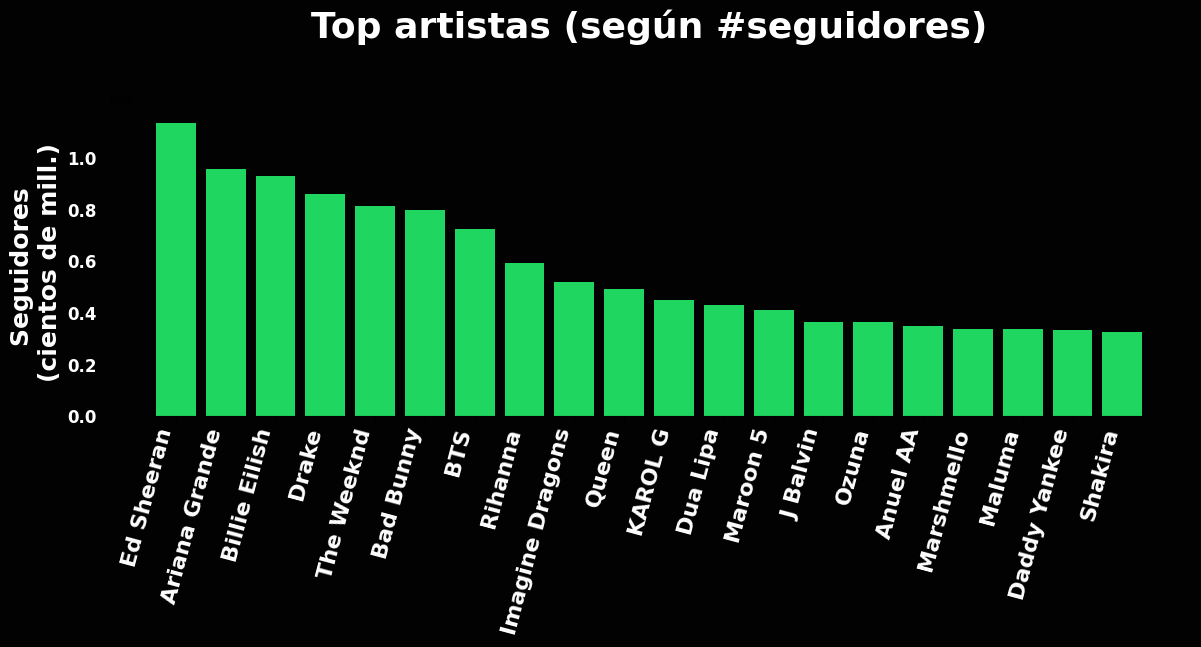

In [24]:
# Grafico de barras para artistas con mayor numero de seguidores
plt.figure(figsize=(14,4), facecolor = '#020202')
ax = plt.axes()
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x = 0.5, y = 1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname = 'Open Sans', rotation = 75, ha = "right", color = 'white', size = 16, weight = 'bold')
plt.setp(ax.get_yticklabels(), fontname = 'Open Sans', color='white', size = 12, weight = 'bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

### Artistas más populares según popularidad en `Colombia`

In [25]:
top_artistas = pd.DataFrame(df_tracks.sort_values(by = ['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas) + 1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Drake,85994585,96,"['canadian hip hop', 'canadian pop', 'hip hop'..."
2,The Weeknd,81300458,95,"['canadian contemporary r&b', 'canadian pop', ..."
3,Bad Bunny,79872204,95,"['reggaeton', 'trap latino', 'urbano latino']"
4,Ariana Grande,95508427,95,['pop']
5,Feid,10498400,91,"['colombian pop', 'pop reggaeton', 'reggaeton'..."
6,Peso Pluma,12611258,91,"['corridos tumbados', 'sad sierreno']"
7,21 Savage,17866977,91,"['atl hip hop', 'hip hop', 'rap']"
8,KAROL G,45042401,90,"['reggaeton', 'reggaeton colombiano', 'trap la..."
9,Rihanna,59060034,90,"['barbadian pop', 'pop', 'urban contemporary']"
10,Fuerza Regida,8007187,89,"['corrido', 'corridos tumbados', 'sad sierreno..."


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

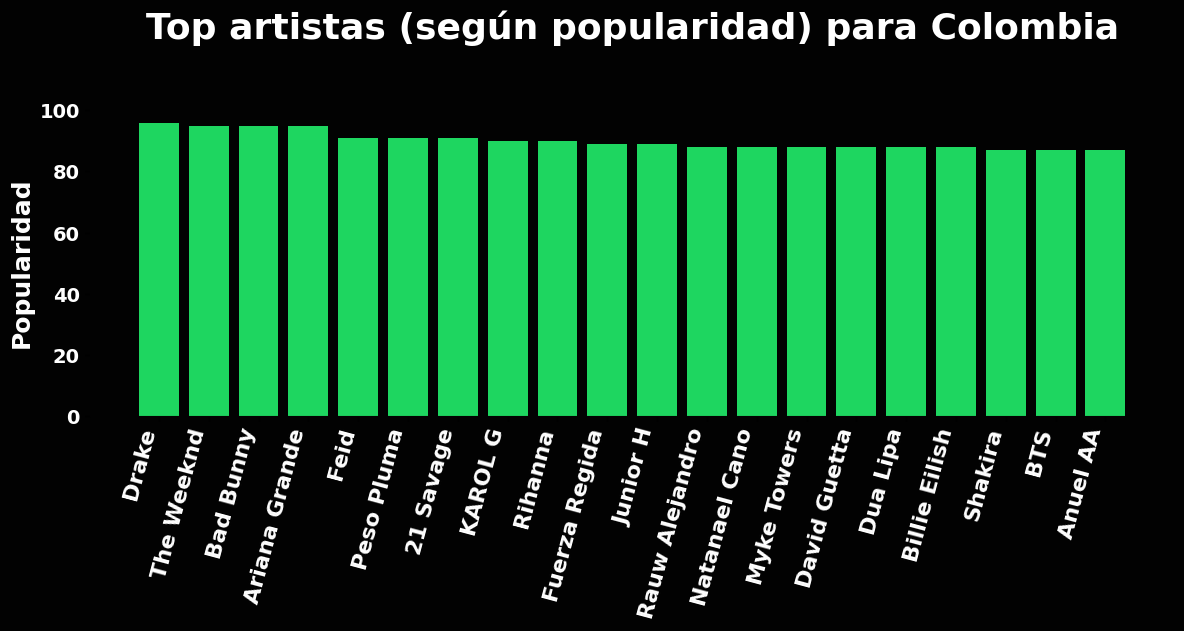

In [26]:
# Grafica de barras para los artistas mas populares en Colombia
plt.figure(figsize=(14,4), facecolor='#020202')
ax = plt.axes()
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color = '#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight = 'bold')
ax.set_title("Top artistas (según popularidad) para Colombia", {'fontname':'Open Sans'}, size = 26, color ='white', weight ='bold', x = 0.5, y = 1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname = 'Open Sans', rotation=75, ha="right", color = 'white', size=16, weight ='bold')
plt.setp(ax.get_yticklabels(), fontname = 'Open Sans', color='white', size=14, weight = 'bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

### Géneros más populares en `Colombia`

In [27]:
top_generos = pd.Series([x for lista in df_tracks['generos_artista'] for x in lista]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 0:'frecuencia'})
top_generos.index = np.arange(1, len(top_generos) + 1)
top_generos

,generos,count
1,urbano latino,571
2,reggaeton,524
3,trap latino,418
4,colombian pop,269
5,latin pop,236
6,reggaeton colombiano,195
7,salsa,164
8,latin hip hop,137
9,tropical,117
10,musica popular colombiana,92


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

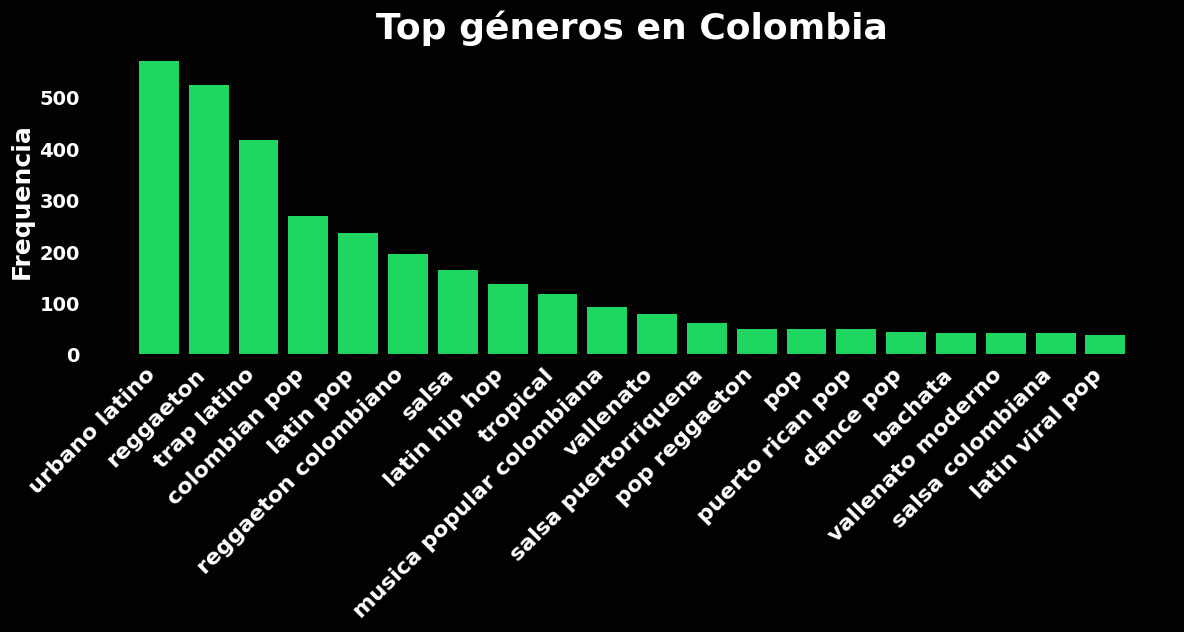

In [29]:
# Grafico de barras de los generos mas top en Colombia
plt.figure(figsize = (14,4), facecolor = '#020202')
ax = plt.axes()
ax.bar(top_generos['generos'], top_generos['count'], color = '#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Open Sans'}, size = 18, color = 'white', weight = 'bold')
ax.set_title("Top géneros en Colombia", {'fontname':'Open Sans'}, size = 26, color = 'white', weight = 'bold', x = 0.5, y = 1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname = 'Open Sans', rotation = 45, ha = "right", color = 'white', size = 16, weight = 'bold')
plt.setp(ax.get_yticklabels(), fontname = 'Open Sans', color = 'white', size=14, weight = 'bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

### Artistas y Canciones más populares (por seguidores) por género más popular en `Colombia`

In [30]:
by_artista = pd.DataFrame(df_tracks.sort_values(by = ['popularidad_artista'],ascending = False)[['popularidad_artista','nombre_artista','generos_artista','artista_id']])
by_artista.astype(str).drop_duplicates().head(20)
by_artista
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on = 'generos', how = 'left')
top_artistas_por_genero

,nombre_artista,popularidad_artista,generos,count
0,Bad Bunny,95,urbano latino,571
1,Bad Bunny,95,reggaeton,524
2,Bad Bunny,95,trap latino,418
3,Feid,91,colombian pop,269
4,Shakira,87,latin pop,236
5,Feid,91,reggaeton colombiano,195
6,Marc Anthony,76,salsa,164
7,Daddy Yankee,86,latin hip hop,137
8,Aventura,79,tropical,117
9,Jessi Uribe,65,musica popular colombiana,92


findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

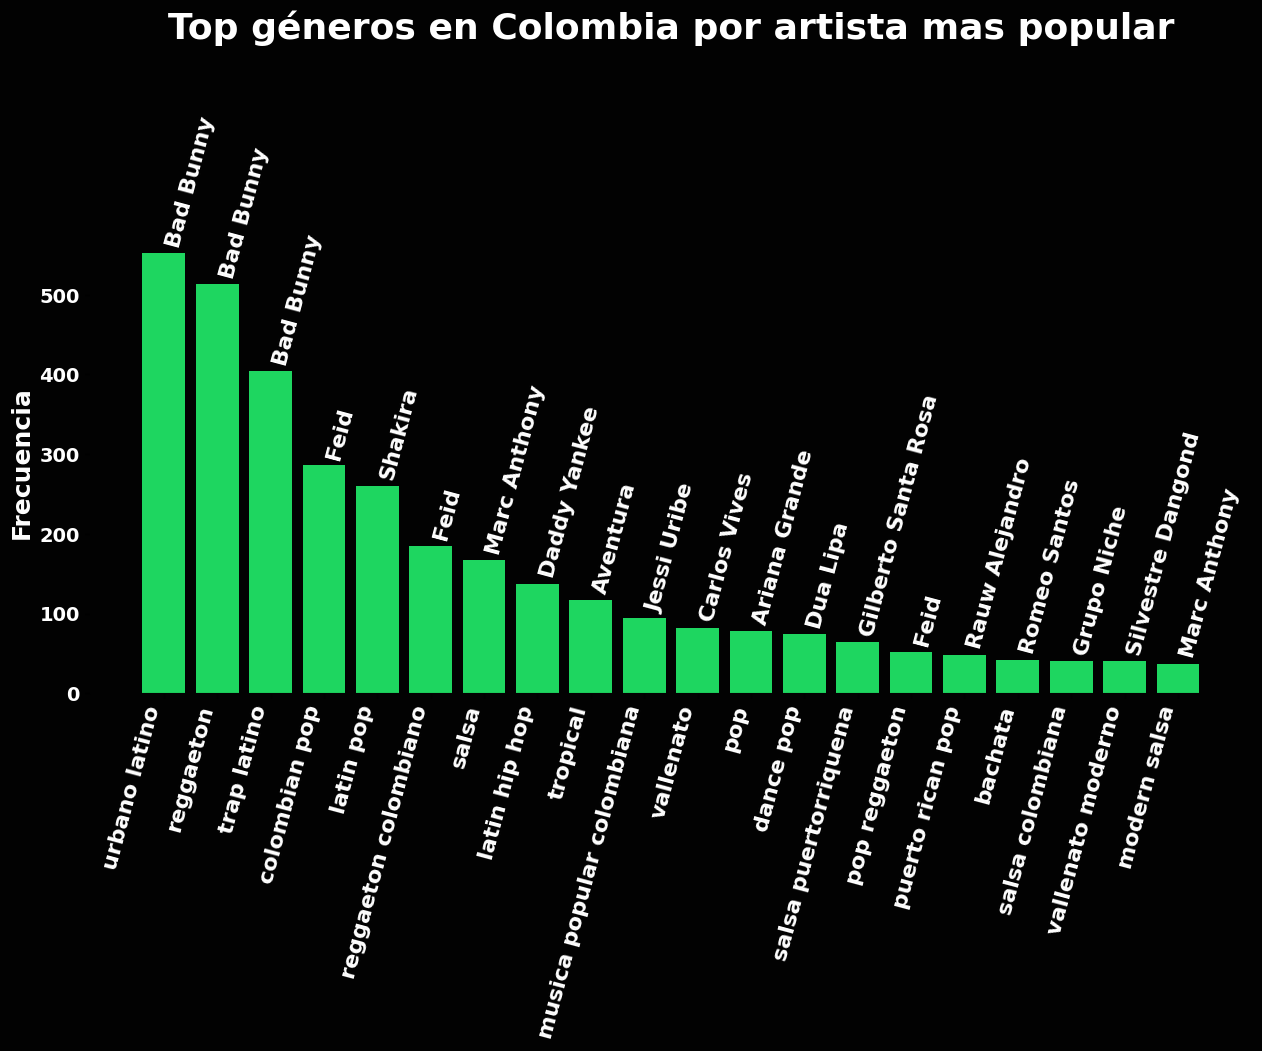

In [ ]:
# Grafico de barras de genero por artistas y canciones mas populares
plt.figure(figsize = (15,6), facecolor = '#020202')
ax = plt.axes()
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['count'], color = '#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight = 'bold')
ax.set_title("Top géneros en Colombia por artista mas popular", {'fontname':'Open Sans'}, size = 26, color='white', weight = 'bold', x = 0.5, y = 1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color = 'white', size = 16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha ="left", va="bottom", fontname = 'Open Sans', color = 'white', size = 16, rotation = 75, weight = 'bold')
plt.show()

### Canciones más populares (por seguidores) por género más popular en `Colombia`

In [31]:
by_track_pop = pd.DataFrame(df_tracks.sort_values(by = ['popularidad'],ascending = False)[['popularidad','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad':row['popularidad'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on = 'generos', how = 'left')
top_canciones_por_genero

,nombre_cancion,popularidad,generos,count
0,Luna,94,urbano latino,571
1,Luna,94,reggaeton,524
2,Luna,94,trap latino,418
3,Luna,94,colombian pop,269
4,Según quién,87,latin pop,236
5,Luna,94,reggaeton colombiano,195
6,Procura,77,salsa,164
7,Dile,84,latin hip hop,137
8,Ella y yo - featuring don omar,80,tropical,117
9,Mi palabra contra la de ellos - en vivo,69,musica popular colombiana,92


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

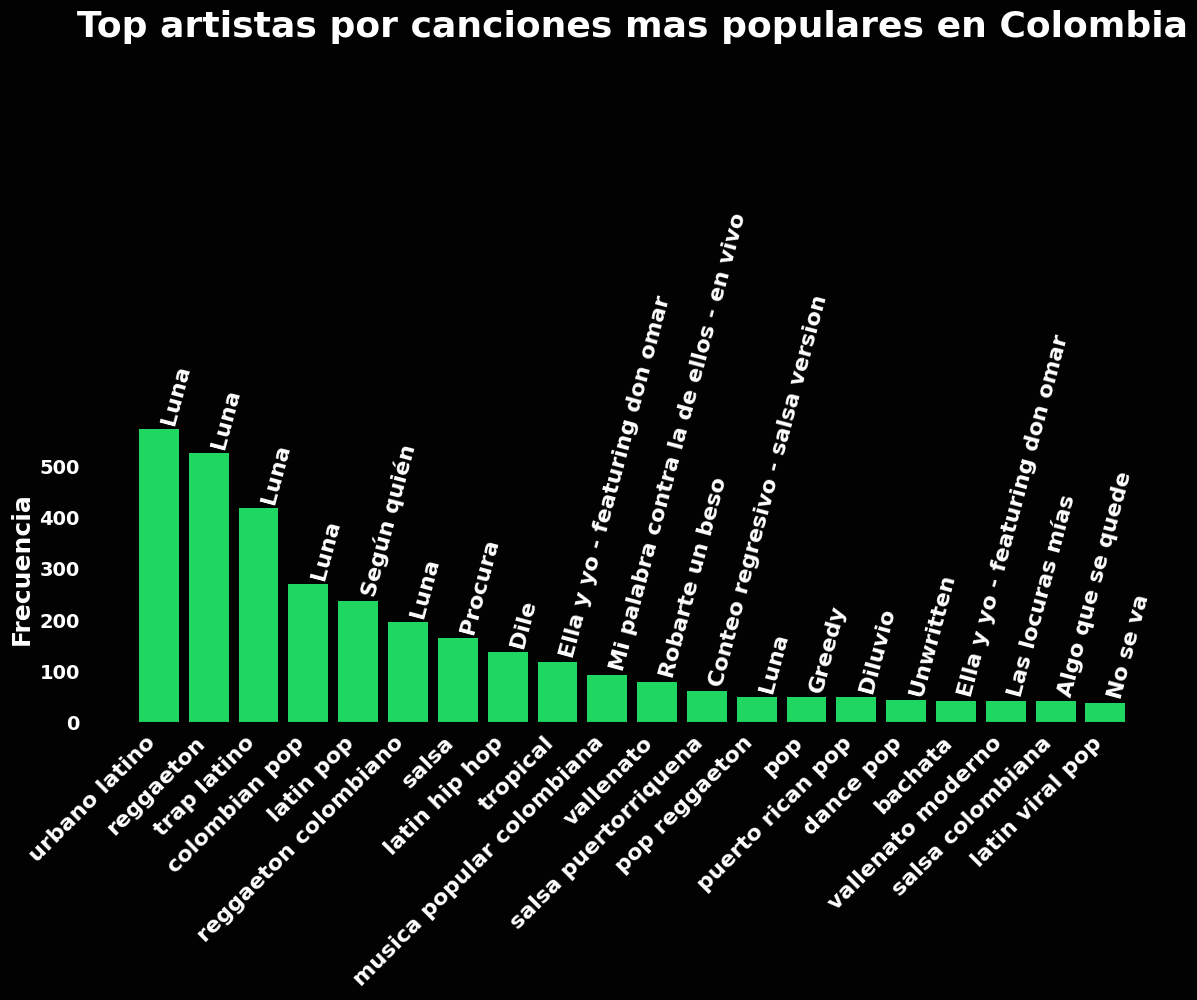

In [32]:
# Grafico de barras de canciones por artistas y canciones mas populares
plt.figure(figsize=(14,4), facecolor = '#020202')
ax = plt.axes()
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['count'], color = '#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas por canciones mas populares en Colombia", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x = 0.5, y = 2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size = 16, weight = 'bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha ="left", va = "bottom", fontname = 'Open Sans', color = 'white', size = 16, rotation = 75, weight = 'bold')

plt.show()

### Análisis de las variables de las canciones

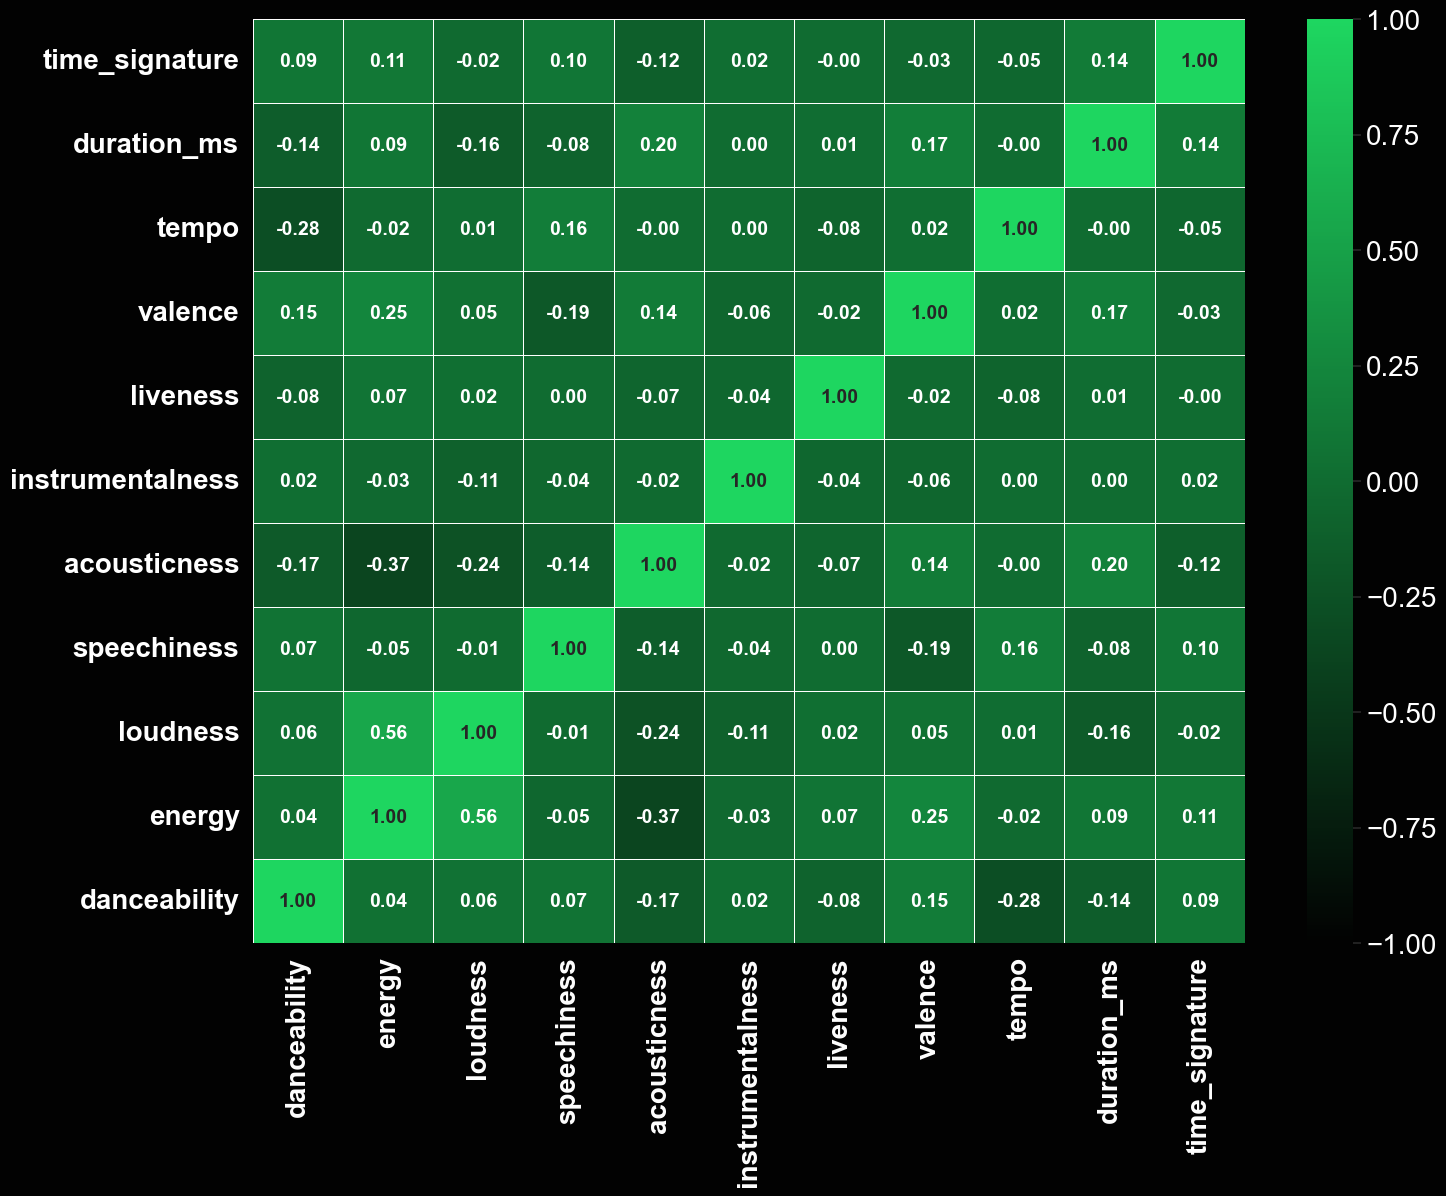

In [34]:
# Definir el mapa de colores para el heatmap
df_numero_var = df_variables.drop('id', axis = 1)
df_numero_var

cmap = LinearSegmentedColormap.from_list('Spotify', ['#020202', '#1ED660'])

# Ajustando el tamaño de la figura para hacerla más grande
plt.figure(figsize=(16, 12))

# Ajustes de Seaborn
sns.set(rc={'axes.facecolor':'#020202', 'figure.facecolor':'#020202'}, font_scale=1.8)

# Crear el gráfico de correlación con un tamaño de figura más grande
ax = sns.heatmap(df_numero_var.corr(), cmap = cmap, vmin = -1, vmax = 1, annot = True, fmt = "0.2f", linewidths = .5,
                 annot_kws = {'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'Sans Serif'})

# Ajustes finales del gráfico
ax.set_ylim([0, 11])  # Ajuste según el número de variables
ax.set(facecolor = 'black')
ax.figure.axes[-1].tick_params(axis="y", labelsize = 20, labelcolor = 'white')  # Ajusta el color de los ticks del colorbar

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_size(20)
    label.set_weight("bold")
    label.set_color("white")

plt.show()

In [35]:
# Crear un dataframe con las variables de las top 100 canciones
var_canc_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_var = pd.DataFrame(columns = var_canc_cols)

for i, track in by_track_pop[:100].iterrows():
    variables = df_variables[df_variables['id'] == track['id_cancion']]

    top_100_var = pd.concat([top_100_var, variables[var_canc_cols]], ignore_index=True)

top_100_var = top_100_var[var_canc_cols]

C:\Users\USER\AppData\Local\Temp\ipykernel_71252\1136334805.py:8: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [36]:
mean_vals = pd.DataFrame(columns = var_canc_cols)

# Calculo de promedio de las top 100 cancione
top_100_mean = top_100_var.mean().to_frame().T
top_100_mean.columns = var_canc_cols

# Calculo el promedio de todas las canciones en df_variables
df_variables_mean = df_variables[var_canc_cols].mean().to_frame().T
df_variables_mean.columns = var_canc_cols

# Uso pd.concat para añadir los DataFrames de promedios al DataFrame mean_vals
mean_vals = pd.concat([mean_vals, top_100_mean, df_variables_mean], ignore_index=True)

mean_vals

C:\Users\USER\AppData\Local\Temp\ipykernel_71252\2935991486.py:12: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.740310,0.694950,0.096124,0.222500,0.013380,0.164398,0.584820
1,0.725693,0.714937,0.091971,0.285243,0.006743,0.169358,0.714846


In [37]:
mean_vals.index = ['Top 100', 'Todas']
mean_vals

# Convertir el DataFrame para ajustarse al formato necesario para el gráfico
categorias = mean_vals.columns.tolist()
valores_top_100 = mean_vals.loc['Top 100'].values.tolist() + [mean_vals.loc['Top 100'][0]]  # Cerrar el círculo
valores_todas = mean_vals.loc['Todas'].values.tolist() + [mean_vals.loc['Todas'][0]]

# Calcular los ángulos para cada categoría
N = len(categorias)
angulos = [n / float(N) * 2 * pi for n in range(N)]
angulos += angulos[:1]

C:\Users\USER\AppData\Local\Temp\ipykernel_71252\2403198480.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\USER\AppData\Local\Temp\ipykernel_71252\2403198480.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



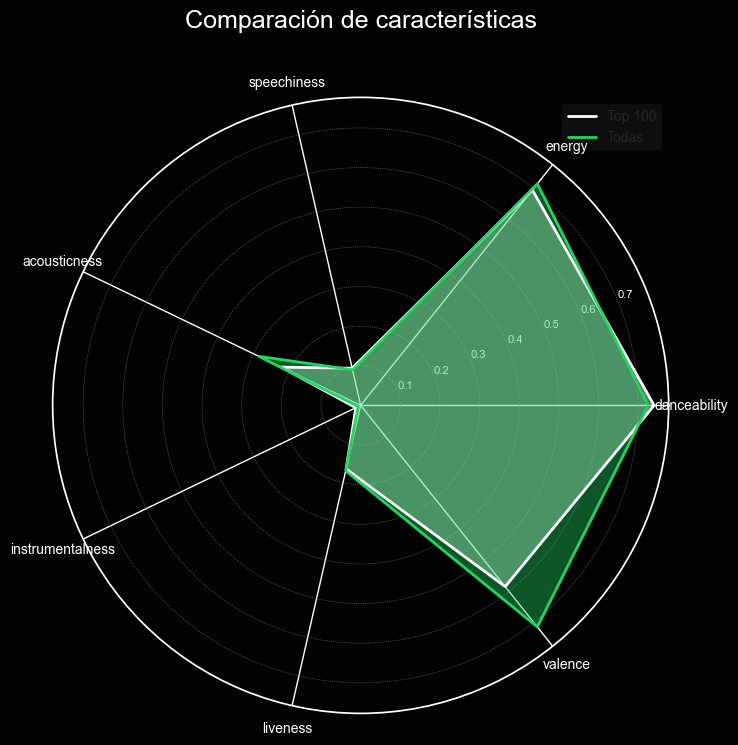

In [38]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Líneas alrededor del radar para "Top 100" y "Todas"
ax.plot(angulos, valores_top_100, color='white', linewidth=2, linestyle='solid', label='Top 100')
ax.fill(angulos, valores_top_100, color='white', alpha=0.4)

ax.plot(angulos, valores_todas, color='#1ED660', linewidth=2, linestyle='solid', label='Todas')
ax.fill(angulos, valores_todas, color='#1ED660', alpha=0.4)

# Nombres de las categorías con un tamaño de fuente más pequeño
plt.xticks(angulos[:-1], categorias, color='grey', size=10)

# Ajuste de cuadrícula y los ticks del eje radial para que sean menos prominentes
ax.yaxis.grid(True, color='grey', linestyle='dotted', linewidth=0.5)
plt.yticks(color='grey', size=8)

# Título y ajustar el fondo y los colores del gráfico
ax.set_facecolor('#020202')
fig.patch.set_facecolor('#020202')
ax.tick_params(colors='white')
plt.title('Comparación de características', size=18, color='white', y=1.1)

# Leyenda con un tamaño de fuente personalizado y fondo transparente
plt.legend(loc='upper right', fontsize=10, frameon=True, facecolor='grey', framealpha=0.1, edgecolor='none')

plt.show()

## Gestión de datos `MySQL`
---
Una vez procesada y analizada, pasamos crear la base de datos donde se va a almacenar la información, para este caso utilizaremos una base de datos relacional `MySQL`.

### Normalización de tablas

En esta parte cogemos la información y realizamos el proceso de normalización con el fin de poder tener estructurada para poder guardar la información en la base de datos. Para ello vamos a crear tres tablas las cuales serán:

- **tracks:** Contiene la información de las canciones.
- **artist:** Contiene la información de los artistas.
- **tracks_variables:** Contiene la información de las variables que pueden variar en tracks.

In [39]:
# Busco los dataframes que se han creado
%whos DataFrame

Variable                   Type         Data/Info
-------------------------------------------------
by_artista                 DataFrame          popularidad_artista<...>\n[1513 rows x 4 columns]
by_track_pop               DataFrame          popularidad        <...>\n[1513 rows x 5 columns]
df_numero_var              DataFrame          danceability  energ<...>n[1513 rows x 11 columns]
df_tracks                  DataFrame                      artista<...>\n[1513 rows x 9 columns]
df_variables               DataFrame          danceability  energ<...>n[1513 rows x 12 columns]
df_variables_mean          DataFrame       danceability    energy<...>\n0  0.169358  0.714846  
mean_vals                  DataFrame             danceability    <...>s    0.169358  0.714846  
top_100_mean               DataFrame       danceability   energy <...> \n0  0.164398  0.58482  
top_100_var                DataFrame        danceability  energy <...>n\n[100 rows x 7 columns]
top_artistas               DataFrame

In [40]:
# Dataframe de canciones
df_tracks

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70,https://i.scdn.co/image/ab67616d0000b273ee3c93...,80,"[colombian pop, latin pop, reggaeton, reggaeto...",22160978
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62,https://i.scdn.co/image/ab67616d0000b2733782a8...,66,"[colombian pop, vallenato, vallenato moderno]",4566007
1698,1zo2ucFhzu58hKcniMpSQs,Soley,1hF43vYDCkaqiclywCXkGp,Todos mienten,48,https://i.scdn.co/image/ab67616d0000b273272937...,45,[],41316
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,1k94CNfVliqDs0qYhkG8iV,12x3,71,https://i.scdn.co/image/ab67616d0000b2733d330a...,60,"[reggaeton colombiano, urbano latino]",557169


In [41]:
# Dataframe de variables de canciones
df_variables

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.774,0.860,-2.888,0.1300,0.13100,0.000000,0.1160,0.446,100.019,7bywjHOc0wSjGGbj04XbVi,196800,4
1,0.726,0.831,-2.035,0.1200,0.01390,0.000004,0.0891,0.489,95.997,7chTH3GBjjAyagf0SPCZDL,152500,4
2,0.911,0.778,-2.248,0.2620,0.08870,0.000022,0.1790,0.345,96.057,7iQXYTyuG13aoeHxGG28Nh,162768,4
3,0.751,0.819,-4.372,0.0409,0.25500,0.000000,0.2360,0.697,131.842,0R6NfOiLzLj4O5VbYSJAjf,172264,3
4,0.909,0.762,-3.974,0.0643,0.43400,0.000000,0.0856,0.843,101.987,4bw8mcDUSRWfQo63ZTYRnU,142335,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.715,0.622,-5.102,0.0460,0.16300,0.000000,0.0948,0.808,80.015,2rCbl9naJYhaxjLsfx88uM,195053,4
1509,0.563,0.877,-2.082,0.1200,0.02930,0.000000,0.0749,0.646,93.832,6f4UPdDBQONKJBRqwZGjaJ,209033,4
1510,0.816,0.791,-4.053,0.2480,0.16100,0.000000,0.0967,0.843,97.501,1hF43vYDCkaqiclywCXkGp,384000,4
1511,0.868,0.729,-4.955,0.1170,0.00107,0.000090,0.2440,0.613,93.989,1k94CNfVliqDs0qYhkG8iV,159200,4


In [42]:
# Creamos una nueva tabla para normalizar
tracks = df_tracks.copy()

In [43]:
tracks

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70,https://i.scdn.co/image/ab67616d0000b273ee3c93...,80,"[colombian pop, latin pop, reggaeton, reggaeto...",22160978
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62,https://i.scdn.co/image/ab67616d0000b2733782a8...,66,"[colombian pop, vallenato, vallenato moderno]",4566007
1698,1zo2ucFhzu58hKcniMpSQs,Soley,1hF43vYDCkaqiclywCXkGp,Todos mienten,48,https://i.scdn.co/image/ab67616d0000b273272937...,45,[],41316
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,1k94CNfVliqDs0qYhkG8iV,12x3,71,https://i.scdn.co/image/ab67616d0000b2733d330a...,60,"[reggaeton colombiano, urbano latino]",557169


In [44]:
# Creamos la tabla de artistas
artist = tracks.copy()

In [45]:
# Sacamos la informacion sobre el artista
columnas_eliminar = ['nombre_cancion', 'popularidad', 'id_cancion', 'imagen_album_url']
artist = artist.drop(columnas_eliminar, axis = 1)
artist

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,80,"[colombian pop, latin pop, reggaeton, reggaeto...",22160978
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,66,"[colombian pop, vallenato, vallenato moderno]",4566007
1698,1zo2ucFhzu58hKcniMpSQs,Soley,45,[],41316
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,60,"[reggaeton colombiano, urbano latino]",557169


In [46]:
artist = artist.drop_duplicates(subset = 'artista_id')
artist

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...
1678,4yjm4SvYqC5FFuLbB6TyHr,Bellakath,68,"[reggaeton mexicano, urbano latino]",940755
1680,3GxIbd5TGVg9Q5zIcmofPO,DAZA,19,[],455
1691,2MBHhHSyqs8LFJsdmgf9pK,Jean Pi,48,[],2488
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,60,"[reggaeton colombiano, urbano latino]",557169


In [47]:
artist['nombre_artista'].value_counts()

nombre_artista
Feid             1
Lenny Tavárez    1
Carin Leon       1
Bad Bunny        1
Xavi             1
                ..
Bellakath        1
DAZA             1
Jean Pi          1
DEKKO            1
Alcolirykoz      1
Name: count, Length: 609, dtype: Int64

In [48]:
artist['generos_artista'] = artist['generos_artista'].apply(lambda x: ', '.join(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_71252\1983959506.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
# Dataframe de artistas normalizado
artist

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,91,"colombian pop, pop reggaeton, reggaeton, regga...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,77,"reggaeton, urbano latino",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,95,"reggaeton, trap latino, urbano latino",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,85,sad sierreno,3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,85,"latin pop, reggaeton, reggaeton colombiano, tr...",33520455
...,...,...,...,...,...
1678,4yjm4SvYqC5FFuLbB6TyHr,Bellakath,68,"reggaeton mexicano, urbano latino",940755
1680,3GxIbd5TGVg9Q5zIcmofPO,DAZA,19,,455
1691,2MBHhHSyqs8LFJsdmgf9pK,Jean Pi,48,,2488
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,60,"reggaeton colombiano, urbano latino",557169


In [50]:
tracks

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,2LRoIwlKmHjgvigdNGBHNo,Feid,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...,91,"[colombian pop, pop reggaeton, reggaeton, regg...",10498400
1,1TA5sGRlKUJXBN4ZyJuDIX,Blessd,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...,77,"[reggaeton, urbano latino]",3607704
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...,95,"[reggaeton, trap latino, urbano latino]",79872204
3,3Me35AWHCGqW4sZ7bWWJt1,Xavi,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...,85,[sad sierreno],3429795
4,1r4hJ1h58CWwUQe3MxPuau,Maluma,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...,85,"[latin pop, reggaeton, reggaeton colombiano, t...",33520455
...,...,...,...,...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,Sebastian Yatra,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70,https://i.scdn.co/image/ab67616d0000b273ee3c93...,80,"[colombian pop, latin pop, reggaeton, reggaeto...",22160978
1697,3OcvS8PzSGYMBvLdzY6g3e,Silvestre Dangond,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62,https://i.scdn.co/image/ab67616d0000b2733782a8...,66,"[colombian pop, vallenato, vallenato moderno]",4566007
1698,1zo2ucFhzu58hKcniMpSQs,Soley,1hF43vYDCkaqiclywCXkGp,Todos mienten,48,https://i.scdn.co/image/ab67616d0000b273272937...,45,[],41316
1699,6ZvYYrrfpb1Z7kICDyxWQE,DEKKO,1k94CNfVliqDs0qYhkG8iV,12x3,71,https://i.scdn.co/image/ab67616d0000b2733d330a...,60,"[reggaeton colombiano, urbano latino]",557169


In [51]:
# Dataframe de canciones normalizaddo
tracks = tracks.drop(['popularidad_artista', 'generos_artista', 'seguidores_artista', 'nombre_artista'], axis = 1)
tracks

,artista_id,id_cancion,nombre_cancion,popularidad,imagen_album_url
0,2LRoIwlKmHjgvigdNGBHNo,7bywjHOc0wSjGGbj04XbVi,Luna,94,https://i.scdn.co/image/ab67616d0000b273f1aad8...
1,1TA5sGRlKUJXBN4ZyJuDIX,7chTH3GBjjAyagf0SPCZDL,Si sabe ferxxo,84,https://i.scdn.co/image/ab67616d0000b2739634fc...
2,4q3ewBCX7sLwd24euuV69X,7iQXYTyuG13aoeHxGG28Nh,Perro negro,91,https://i.scdn.co/image/ab67616d0000b2737b1fc5...
3,3Me35AWHCGqW4sZ7bWWJt1,0R6NfOiLzLj4O5VbYSJAjf,La diabla,94,https://i.scdn.co/image/ab67616d0000b2731501c7...
4,1r4hJ1h58CWwUQe3MxPuau,4bw8mcDUSRWfQo63ZTYRnU,Según quién,87,https://i.scdn.co/image/ab67616d0000b273d688b9...
...,...,...,...,...,...
1696,07YUOmWljBTXwIseAUd9TW,2rCbl9naJYhaxjLsfx88uM,Pareja del año,70,https://i.scdn.co/image/ab67616d0000b273ee3c93...
1697,3OcvS8PzSGYMBvLdzY6g3e,6f4UPdDBQONKJBRqwZGjaJ,Cásate conmigo,62,https://i.scdn.co/image/ab67616d0000b2733782a8...
1698,1zo2ucFhzu58hKcniMpSQs,1hF43vYDCkaqiclywCXkGp,Todos mienten,48,https://i.scdn.co/image/ab67616d0000b273272937...
1699,6ZvYYrrfpb1Z7kICDyxWQE,1k94CNfVliqDs0qYhkG8iV,12x3,71,https://i.scdn.co/image/ab67616d0000b2733d330a...


In [52]:
df_variables

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.774,0.860,-2.888,0.1300,0.13100,0.000000,0.1160,0.446,100.019,7bywjHOc0wSjGGbj04XbVi,196800,4
1,0.726,0.831,-2.035,0.1200,0.01390,0.000004,0.0891,0.489,95.997,7chTH3GBjjAyagf0SPCZDL,152500,4
2,0.911,0.778,-2.248,0.2620,0.08870,0.000022,0.1790,0.345,96.057,7iQXYTyuG13aoeHxGG28Nh,162768,4
3,0.751,0.819,-4.372,0.0409,0.25500,0.000000,0.2360,0.697,131.842,0R6NfOiLzLj4O5VbYSJAjf,172264,3
4,0.909,0.762,-3.974,0.0643,0.43400,0.000000,0.0856,0.843,101.987,4bw8mcDUSRWfQo63ZTYRnU,142335,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.715,0.622,-5.102,0.0460,0.16300,0.000000,0.0948,0.808,80.015,2rCbl9naJYhaxjLsfx88uM,195053,4
1509,0.563,0.877,-2.082,0.1200,0.02930,0.000000,0.0749,0.646,93.832,6f4UPdDBQONKJBRqwZGjaJ,209033,4
1510,0.816,0.791,-4.053,0.2480,0.16100,0.000000,0.0967,0.843,97.501,1hF43vYDCkaqiclywCXkGp,384000,4
1511,0.868,0.729,-4.955,0.1170,0.00107,0.000090,0.2440,0.613,93.989,1k94CNfVliqDs0qYhkG8iV,159200,4


In [53]:
tracks_variable = df_variables.copy()

In [54]:
# Dataframe de variables normalizado
tracks_variable = tracks_variable.drop_duplicates(subset = 'id')

### Conexion a la base de datos

Para este caso, utilizaremos la base de datos de `MySQL` y vamos a realizar la debida conexión y creación de la base de datos.

In [55]:
# conexion a la base de datos
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost')

In [56]:
conexion

In [57]:
# Validmos los schemas o base de datos creadas
cursor = conexion.cursor()
query = "SHOW DATABASES"
cursor.execute(query)

for x in cursor:
    print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)


In [58]:
# Creamos el database 'spotify'
cursor = conexion.cursor()
query = 'CREATE DATABASE spotify'
cursor.execute(query)

In [59]:
# Creamos los tablas con los dataframes creados
user = 'root'
password = 'chester' # Cambiar por la contraseña de su servidor
host = 'localhost'
database = 'spotify'

url_de_conexion = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
motor = create_engine(url_de_conexion)

artist.to_sql('artist', con = motor, if_exists = 'replace', index = False)
tracks.to_sql('tracks', con = motor, if_exists = 'replace', index = False)
tracks_variable.to_sql('tracks_variable', con = motor, if_exists = 'replace', index = False)

1513

In [60]:
# Cambiamos el tipo de dato para poder hacer la relacion (tabla artist)
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query = 'ALTER TABLE artist CHANGE artista_id artista_id VARCHAR(255);'
cursor.execute(query)
conexion.commit()

In [61]:
# Cambiamos el tipo de dato para poder hacer la relacion (tabla artist)
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query = 'ALTER TABLE tracks CHANGE artista_id artista_id VARCHAR(255);'
cursor.execute(query)
conexion.commit()

In [62]:
# Cambiamos el tipo de dato para poder hacer la relacion (tablas track - tracks_variable)
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query_1 = 'ALTER TABLE tracks CHANGE id_cancion id_cancion VARCHAR(255);'
query_2 = 'ALTER TABLE tracks_variable CHANGE id id VARCHAR(255);'
cursor.execute(query_1)
cursor.execute(query_2)
conexion.commit()

In [63]:
# Creamos las primary key de las tablas
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query_1 = 'ALTER TABLE artist ADD PRIMARY KEY (artista_id);'
query_2 = 'ALTER TABLE tracks ADD PRIMARY KEY (id_cancion);'
query_3 = 'ALTER TABLE tracks_variable ADD PRIMARY KEY (id);'
cursor.execute(query_1)
cursor.execute(query_2)
cursor.execute(query_3)
conexion.commit()

In [64]:
# Creamos las relaciones de las tablas
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query = 'ALTER TABLE tracks ADD CONSTRAINT fk_artista_id FOREIGN KEY (artista_id) REFERENCES artist (artista_id) ON DELETE CASCADE ON UPDATE CASCADE;'
cursor.execute(query)
conexion.commit()

In [65]:
# Creamos las relaciones de las tablas
conexion = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify')
cursor = conexion.cursor()
query = 'ALTER TABLE tracks_variable ADD CONSTRAINT fk_tracks_id FOREIGN KEY (id) REFERENCES tracks (id_cancion) ON DELETE CASCADE ON UPDATE CASCADE;'
cursor.execute(query)
conexion.commit()

### Inserción de nuevos datos
---
En esta etapa, procederemos a realizar nuevamente la extracción de datos utilizando la API de Spotify, seguido de la inserción de estos datos en nuestra base de datos para su posterior análisis y utilización.

In [4]:
# Market seleccionado para Colombia
location_track_id = ['41K6jx42E54zAKXfzgXfGt', '36knKkCMLhs74mv1Tie5ez']

# Lista para guardar informacion
consolidated_tracks_data = []

# Conjunto para validar y no tener duplicados
track_ids_seen = set()

# Extraccion de los datos
for i in location_track_id:
    tracks = sp.playlist_tracks(i)

    # Validacion para no generar duplicados
    for item in tracks['items']:
        if item['track']:
            track = item['track']
            track_id = track['id']

            if track_id in track_ids_seen:
                continue

            track_ids_seen.add(track_id)

            # Almacenamiento de la data recorrida a la lista
            track_info = {
                'artista_id': track['artists'][0]['id'],
                'nombre_artista': track['artists'][0]['name'],
                'id_cancion':track['id'],
                'nombre_cancion': track['name'],
                'popularidad': track['popularity']
            }
            consolidated_tracks_data.append(track_info)

# Creo un DataFrame con la data recopilada
df_tracks_1 = pd.DataFrame(consolidated_tracks_data)

In [5]:
# Muestra de como queda el DataFrame
df_tracks_1.head()

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad
0,5gUZ67Vzi1FV2SnrWl1GlE,Benny Benni,7BSRsN1Aw98BboPe5K4c5V,El Combo Me Llama 2.1,32
1,1i8SpTcr7yvPOmcqrbnVXY,Ozuna,2FrnTVSHjgnEylKGdHRUK1,"Diles (feat. Arcangel, Nengo Flow, Dj Luian & ...",0
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,6ElmxV9B2mSNscEjP27M7i,Chambea,0
3,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,0lJCqIx5BhZtf6QtYI2fbv,Vuelve,0
4,0eHQ9o50hj6ZDNBt6Ys1sD,Yandel,5YzA563GXTuwQaRq24z1k5,Como Antes (feat. Wisin),61


In [6]:
# Cambiamos caligrafia del nombre de las canciones
df_tracks_1['nombre_cancion'] = df_tracks_1['nombre_cancion'].str.capitalize()

In [7]:
# Eliminamos algunos duplicados
df_tracks_1 = df_tracks_1.drop_duplicates(subset = 'nombre_cancion', keep = 'first')
df_tracks_1

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad
0,5gUZ67Vzi1FV2SnrWl1GlE,Benny Benni,7BSRsN1Aw98BboPe5K4c5V,El combo me llama 2.1,32
1,1i8SpTcr7yvPOmcqrbnVXY,Ozuna,2FrnTVSHjgnEylKGdHRUK1,"Diles (feat. arcangel, nengo flow, dj luian & ...",0
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,6ElmxV9B2mSNscEjP27M7i,Chambea,0
3,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,0lJCqIx5BhZtf6QtYI2fbv,Vuelve,0
4,0eHQ9o50hj6ZDNBt6Ys1sD,Yandel,5YzA563GXTuwQaRq24z1k5,Como antes (feat. wisin),61
...,...,...,...,...,...
178,7tU1VKOuxiNZwBZC6RHidA,Alexis y Fido,7EAra9GbPKab8OsNk0UJyN,Mala conducta - remix,42
179,64aJYyrXljOodnUG6jvhRD,DJ Luian,0NBe8c7u2nV2WC4sqM0rct,"Tremenda sata pt. 3 (remix) [feat. arcangel, j...",31
180,1ykothWH0xl8drRyJWuw7I,Ñejo & Dalmata,4oYN44rloSqxabqrSgIani,Algo musical,51
181,16lcPccJgIjtOWEwVMyA6Z,Tony Lenta,5vkezx9vfpB0s0SbTbh7gu,Tu conmigo (feat. arcangel),0


In [8]:
# Lista para guardar las URLs de las imágenes del álbum de las canciones
imagenes_album_url = []

for id_c in df_tracks_1.id_cancion:
    track_details = sp.track(id_c) # # Obtiene los detalles del track usando el ID del track
    album_images = track_details['album']['images']

    # Selecciona la primera imagen (la más grande) si hay imágenes disponibles
    if album_images:
        imagen_url = album_images[0]['url']
    else:
        imagen_url = None # O alguna URL de imagen por defecto si prefieres
    
    imagenes_album_url.append(imagen_url)

In [9]:
# Añadimos la lista de URLs de imágenes al DataFrame
df_tracks_1['imagen_album_url'] = imagenes_album_url

In [10]:
# Listas para nueva informacion
popularidad_artista = []
generos_artista = []
seguidores_artista = []

# Extraccion de los datos para artistas
for id_a in df_tracks_1.artista_id:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [11]:
# Agremos la informacion al DataFrame
df_tracks_1 = df_tracks_1.assign(popularidad_artista = popularidad_artista, generos_artista = generos_artista, seguidores_artista = seguidores_artista)
df_tracks_1.head()

,artista_id,nombre_artista,id_cancion,nombre_cancion,popularidad,imagen_album_url,popularidad_artista,generos_artista,seguidores_artista
0,5gUZ67Vzi1FV2SnrWl1GlE,Benny Benni,7BSRsN1Aw98BboPe5K4c5V,El combo me llama 2.1,32,https://i.scdn.co/image/ab67616d0000b273a5b270...,50,"[reggaeton, reggaeton flow, urbano latino]",343912
1,1i8SpTcr7yvPOmcqrbnVXY,Ozuna,2FrnTVSHjgnEylKGdHRUK1,"Diles (feat. arcangel, nengo flow, dj luian & ...",0,https://i.scdn.co/image/ab67616d0000b273e02a38...,86,"[puerto rican pop, reggaeton, trap latino, urb...",36388819
2,4q3ewBCX7sLwd24euuV69X,Bad Bunny,6ElmxV9B2mSNscEjP27M7i,Chambea,0,https://i.scdn.co/image/ab67616d0000b2730df928...,95,"[reggaeton, trap latino, urbano latino]",79939380
3,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,0lJCqIx5BhZtf6QtYI2fbv,Vuelve,0,https://i.scdn.co/image/ab67616d0000b27327fd27...,86,"[latin hip hop, reggaeton, trap latino, urbano...",33375120
4,0eHQ9o50hj6ZDNBt6Ys1sD,Yandel,5YzA563GXTuwQaRq24z1k5,Como antes (feat. wisin),61,https://i.scdn.co/image/ab67616d0000b273b54d1c...,78,"[latin hip hop, reggaeton, trap latino, urbano...",7444097


### Validación de datos
--- 
En esta parte realizamos lo que es una validación de duplicados en la base de principal, para saber que datos ya se encuentran registrados y no registrarlos dos veces en la base de datos.

In [12]:
# Nos conectamos a la base de datos y hacemos la validacion directamente
conn = mysql.connector.connect(user = 'root', password = 'chester', host = 'localhost', database = 'spotify', port = '3306')

In [13]:
df = pd.read_sql('SELECT * FROM tracks', con = conn)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_19284\2993285025.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,artista_id,id_cancion,nombre_cancion,popularidad,imagen_album_url
0,3ygJTpJJIK7eEeC2EFRl9D,00jmSvshmJtTF8m3tc7xit,Medellificación,60,https://i.scdn.co/image/ab67616d0000b273cb0e14...
1,4IC2X34tZmHG3VfTbpzvwL,01EzG8Qg7oQqYMTNV5YkOW,Cochinae,65,https://i.scdn.co/image/ab67616d0000b273da5d0a...
2,1r4hJ1h58CWwUQe3MxPuau,01vHGJRvJ6EZW9KO8NtZpi,"Un polvo (feat. bad bunny, arcángel, ñengo flo...",69,https://i.scdn.co/image/ab67616d0000b2737b4e63...
3,2LRoIwlKmHjgvigdNGBHNo,01W6syCgxisKd0gDqFRdEG,La vuelta,74,https://i.scdn.co/image/ab67616d0000b273f1aad8...
4,5C4PDR4LnhZTbVnKWXuDKD,02dsc9B5N8BFatjGcGhk1u,Al aire,55,https://i.scdn.co/image/ab67616d0000b273e67763...
...,...,...,...,...,...
1508,4yjm4SvYqC5FFuLbB6TyHr,7yIIeKUxTpn36X6CFJhgEi,Reggaeton champagne,81,https://i.scdn.co/image/ab67616d0000b273ae47c3...
1509,1JzCCMAjM3FCr9eM3jp0uH,7ynTwByYTgs1UsWoQvWdvI,Ella es mi todo,58,https://i.scdn.co/image/ab67616d0000b273dda96e...
1510,6osZmjgq0xc7VroWgQoRcD,7z5D9mhn0LNqYLqCrtEdR9,Esto no es moda,0,https://i.scdn.co/image/ab67616d0000b2734b35b5...
1511,4uRH0vTYaGWjG1MK8K8RPE,7zsNAP0yvZq3aeIoAfyQj6,Fruta prohibida,0,https://i.scdn.co/image/ab67616d0000b27369bdc4...


In [21]:
df_tracks_1 = df_tracks_1.loc[~df_tracks_1['nombre_cancion'].isin(df['nombre_cancion'])]

In [22]:
# Listas para nueva informacion
variables_cancion = []

# Extraccion de variables
for x in df_tracks_1['id_cancion']:
  af = sp.audio_features(x)
  variables_cancion.append(af)

In [23]:
# Imprimimos las llaves que generan del json de la informacion
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [24]:
# Muestra de la informacion en json
variables_cancion

[[{'danceability': 0.812,
   'energy': 0.691,
   'key': 8,
   'loudness': -5.837,
   'mode': 0,
   'speechiness': 0.352,
   'acousticness': 0.614,
   'instrumentalness': 1.04e-05,
   'liveness': 0.226,
   'valence': 0.876,
   'tempo': 168.024,
   'type': 'audio_features',
   'id': '2TmT3wSwRf0CYJFGGaIXNB',
   'uri': 'spotify:track:2TmT3wSwRf0CYJFGGaIXNB',
   'track_href': 'https://api.spotify.com/v1/tracks/2TmT3wSwRf0CYJFGGaIXNB',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2TmT3wSwRf0CYJFGGaIXNB',
   'duration_ms': 255607,
   'time_signature': 4}],
 [{'danceability': 0.798,
   'energy': 0.487,
   'key': 1,
   'loudness': -4.939,
   'mode': 1,
   'speechiness': 0.206,
   'acousticness': 0.0682,
   'instrumentalness': 0,
   'liveness': 0.0925,
   'valence': 0.292,
   'tempo': 151.02,
   'type': 'audio_features',
   'id': '7MjaU5iFujwT1gOyvJnqNp',
   'uri': 'spotify:track:7MjaU5iFujwT1gOyvJnqNp',
   'track_href': 'https://api.spotify.com/v1/tracks/7MjaU5iFujwT1gOyvJnqNp

In [25]:
# Extraemos la informacion que se encuentra en sublista
datos_corregidos = []

for x in variables_cancion:
    for y in x:
        datos_corregidos.append(y)

In [26]:
# Convetimos la informacion en un DataFrame
df_variables_1 = pd.DataFrame(datos_corregidos)
df_variables_1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.812,0.691,8,-5.837,0,0.3520,0.6140,0.00001,0.2260,0.876,168.024,audio_features,2TmT3wSwRf0CYJFGGaIXNB,spotify:track:2TmT3wSwRf0CYJFGGaIXNB,https://api.spotify.com/v1/tracks/2TmT3wSwRf0C...,https://api.spotify.com/v1/audio-analysis/2TmT...,255607,4
1,0.798,0.487,1,-4.939,1,0.2060,0.0682,0.00000,0.0925,0.292,151.020,audio_features,7MjaU5iFujwT1gOyvJnqNp,spotify:track:7MjaU5iFujwT1gOyvJnqNp,https://api.spotify.com/v1/tracks/7MjaU5iFujwT...,https://api.spotify.com/v1/audio-analysis/7Mja...,246360,4
2,0.768,0.786,8,-4.437,1,0.1590,0.1690,0.00000,0.2830,0.823,81.955,audio_features,4xF2lHynkaaV5I8hujDPTz,spotify:track:4xF2lHynkaaV5I8hujDPTz,https://api.spotify.com/v1/tracks/4xF2lHynkaaV...,https://api.spotify.com/v1/audio-analysis/4xF2...,352752,4
3,0.732,0.946,6,-3.524,0,0.1680,0.1830,0.00000,0.4160,0.926,172.011,audio_features,5NbyNW20LFcb1XkJMtqVT4,spotify:track:5NbyNW20LFcb1XkJMtqVT4,https://api.spotify.com/v1/tracks/5NbyNW20LFcb...,https://api.spotify.com/v1/audio-analysis/5Nby...,217674,4
4,0.656,0.860,8,-6.077,1,0.2590,0.2600,0.00000,0.6580,0.951,84.769,audio_features,5JeWCwjgPvs47kMXD7iKTH,spotify:track:5JeWCwjgPvs47kMXD7iKTH,https://api.spotify.com/v1/tracks/5JeWCwjgPvs4...,https://api.spotify.com/v1/audio-analysis/5JeW...,307775,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.591,0.749,10,-4.767,0,0.3340,0.4080,0.00000,0.0892,0.645,83.747,audio_features,0X5rkzc0CfvMdXlY7oAm3y,spotify:track:0X5rkzc0CfvMdXlY7oAm3y,https://api.spotify.com/v1/tracks/0X5rkzc0CfvM...,https://api.spotify.com/v1/audio-analysis/0X5r...,181547,4
66,0.696,0.849,6,-7.383,0,0.1030,0.2250,0.00000,0.4150,0.958,176.017,audio_features,7EAra9GbPKab8OsNk0UJyN,spotify:track:7EAra9GbPKab8OsNk0UJyN,https://api.spotify.com/v1/tracks/7EAra9GbPKab...,https://api.spotify.com/v1/audio-analysis/7EAr...,355318,4
67,0.699,0.869,2,-4.553,1,0.1170,0.0578,0.00000,0.5300,0.872,171.934,audio_features,0NBe8c7u2nV2WC4sqM0rct,spotify:track:0NBe8c7u2nV2WC4sqM0rct,https://api.spotify.com/v1/tracks/0NBe8c7u2nV2...,https://api.spotify.com/v1/audio-analysis/0NBe...,497898,4
68,0.729,0.773,11,-4.695,0,0.0901,0.1870,0.00000,0.1060,0.744,173.959,audio_features,5vkezx9vfpB0s0SbTbh7gu,spotify:track:5vkezx9vfpB0s0SbTbh7gu,https://api.spotify.com/v1/tracks/5vkezx9vfpB0...,https://api.spotify.com/v1/audio-analysis/5vke...,229538,4


In [27]:
# Creamos una nueva tabla para normalizar
tracks_1 = df_tracks_1.copy()

In [29]:
# Dataframe de canciones normalizaddo
tracks_1.drop(['popularidad_artista', 'generos_artista', 'seguidores_artista', 'nombre_artista'], axis = 1, inplace = True)
tracks_1

,artista_id,id_cancion,nombre_cancion,popularidad,imagen_album_url
101,4SsVbpTthjScTS7U2hmr1X,2TmT3wSwRf0CYJFGGaIXNB,Si te veo,58,https://i.scdn.co/image/ab67616d0000b273ed420b...
102,4SsVbpTthjScTS7U2hmr1X,7MjaU5iFujwT1gOyvJnqNp,Original,57,https://i.scdn.co/image/ab67616d0000b273275b16...
103,4SsVbpTthjScTS7U2hmr1X,4xF2lHynkaaV5I8hujDPTz,Feliz navidad 4,0,https://i.scdn.co/image/ab67616d0000b273fb5915...
105,64aJYyrXljOodnUG6jvhRD,5NbyNW20LFcb1XkJMtqVT4,Tremenda sata,45,https://i.scdn.co/image/ab67616d0000b273cc7572...
106,4SsVbpTthjScTS7U2hmr1X,5JeWCwjgPvs47kMXD7iKTH,Feliz navidad 3,57,https://i.scdn.co/image/ab67616d0000b2732b1449...
...,...,...,...,...,...
177,4SsVbpTthjScTS7U2hmr1X,0X5rkzc0CfvMdXlY7oAm3y,Ayer escuché una voz,29,https://i.scdn.co/image/ab67616d0000b273172b68...
178,7tU1VKOuxiNZwBZC6RHidA,7EAra9GbPKab8OsNk0UJyN,Mala conducta - remix,42,https://i.scdn.co/image/ab67616d0000b273a82fd1...
179,64aJYyrXljOodnUG6jvhRD,0NBe8c7u2nV2WC4sqM0rct,"Tremenda sata pt. 3 (remix) [feat. arcangel, j...",31,https://i.scdn.co/image/ab67616d0000b273326f1f...
181,16lcPccJgIjtOWEwVMyA6Z,5vkezx9vfpB0s0SbTbh7gu,Tu conmigo (feat. arcangel),0,https://i.scdn.co/image/ab67616d0000b27309305d...


In [31]:
# Creamos la tabla de artistas
artist_1 = df_tracks_1.copy()

In [32]:
# Sacamos la informacion sobre el artista
columnas_eliminar = ['nombre_cancion', 'popularidad', 'id_cancion', 'imagen_album_url']
artist_1.drop(columnas_eliminar, axis = 1, inplace = True)
artist_1


,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
101,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
102,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
103,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
105,64aJYyrXljOodnUG6jvhRD,DJ Luian,76,"[reggaeton, reggaeton flow, trap latino, urban...",2139098
106,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
...,...,...,...,...,...
177,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
178,7tU1VKOuxiNZwBZC6RHidA,Alexis y Fido,65,"[latin hip hop, reggaeton, urbano latino]",5133840
179,64aJYyrXljOodnUG6jvhRD,DJ Luian,76,"[reggaeton, reggaeton flow, trap latino, urban...",2139098
181,16lcPccJgIjtOWEwVMyA6Z,Tony Lenta,41,"[reggaeton, reggaeton flow]",188218


In [33]:
artist_1 = artist_1.drop_duplicates(subset = 'artista_id')
artist_1

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
101,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"[latin hip hop, reggaeton, trap latino, urbano...",13633687
105,64aJYyrXljOodnUG6jvhRD,DJ Luian,76,"[reggaeton, reggaeton flow, trap latino, urban...",2139098
108,6nVcHLIgY5pE2YCl8ubca1,Jhayco,82,"[reggaeton, trap latino, urbano latino]",7462960
112,3nuuzbcB3ZdqrEQYqR2SQJ,Lui-G 21+,37,"[reggaeton, reggaeton flow]",100250
113,5W3QNsK8PQNTvI9Y9PDyhs,Tali,18,[],15821
115,12vb80Km0Ew53ABfJOepVz,Ñengo Flow,80,"[reggaeton, trap latino, urbano latino]",5709545
116,7tU1VKOuxiNZwBZC6RHidA,Alexis y Fido,65,"[latin hip hop, reggaeton, urbano latino]",5133840
119,7LXdYckhvHWU4ejXbkHa3N,Pepe Quintana,57,"[reggaeton, reggaeton flow, trap latino, urban...",833990
121,5VHv8HRkyW4zmhoYXu476k,Opi the Hit Machine,49,[reggaeton flow],48616
124,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,86,"[latin hip hop, reggaeton, trap latino, urbano...",33375120


In [34]:
artist_1['generos_artista'] = artist_1['generos_artista'].apply(lambda x: ', '.join(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_19284\1545210257.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
artist_1

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
101,4SsVbpTthjScTS7U2hmr1X,Arcángel,83,"latin hip hop, reggaeton, trap latino, urbano ...",13633687
105,64aJYyrXljOodnUG6jvhRD,DJ Luian,76,"reggaeton, reggaeton flow, trap latino, urbano...",2139098
108,6nVcHLIgY5pE2YCl8ubca1,Jhayco,82,"reggaeton, trap latino, urbano latino",7462960
112,3nuuzbcB3ZdqrEQYqR2SQJ,Lui-G 21+,37,"reggaeton, reggaeton flow",100250
113,5W3QNsK8PQNTvI9Y9PDyhs,Tali,18,,15821
115,12vb80Km0Ew53ABfJOepVz,Ñengo Flow,80,"reggaeton, trap latino, urbano latino",5709545
116,7tU1VKOuxiNZwBZC6RHidA,Alexis y Fido,65,"latin hip hop, reggaeton, urbano latino",5133840
119,7LXdYckhvHWU4ejXbkHa3N,Pepe Quintana,57,"reggaeton, reggaeton flow, trap latino, urbano...",833990
121,5VHv8HRkyW4zmhoYXu476k,Opi the Hit Machine,49,reggaeton flow,48616
124,4VMYDCV2IEDYJArk749S6m,Daddy Yankee,86,"latin hip hop, reggaeton, trap latino, urbano ...",33375120


### Validación de artistas
---
Realizamos una verificación exhaustiva en la base de datos para confirmar si los artistas que se van a añadir ya están registrados, garantizando así la unicidad de los registros.

In [36]:
artistas = pd.read_sql('SELECT * FROM artist', con = conn)
artistas

C:\Users\USER\AppData\Local\Temp\ipykernel_19284\108264129.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
0,00me4Ke1LsvMxt5kydlMyU,Cosculluela,73,"latin hip hop, reggaeton, trap latino, urbano ...",5864677
1,00XhexlJEXQstHimpZN910,Brytiago,74,"reggaeton, trap latino, urbano latino",6695762
2,01p7Homi0d4XxZ06f2NYYD,La Sonora Matancera,56,"bolero, mambo, musica tradicional cubana, salsa",257450
3,01rgao9OzfBm2BOHWJpi1Y,Espinoza Paz,65,"banda, musica mexicana, norteno, ranchera",3491126
4,01RWu7yf1vE3eZvtxcRxkf,Kevin Florez,47,champeta,123280
...,...,...,...,...,...
604,7vPGzgDg3qGUY5bWtrO3K4,Conkarah,49,jawaiian,77282
605,7waNCUQ1Ne7OoNHgqpgMZ7,Luis Figueroa,51,,10444
606,7wOZy3KdFVVINgNFFxkxwO,Jerry Rivera,66,"latin pop, puerto rican pop, salsa, salsa puer...",1904750
607,7x5Slu7yTE5icZjNsc3OzW,Willie Colón,69,"salsa, tropical",1822974


In [39]:
artist_1 = artist_1.loc[~artist_1['nombre_artista'].isin(artistas['nombre_artista'])]
artist_1

,artista_id,nombre_artista,popularidad_artista,generos_artista,seguidores_artista
112,3nuuzbcB3ZdqrEQYqR2SQJ,Lui-G 21+,37,"reggaeton, reggaeton flow",100250
119,7LXdYckhvHWU4ejXbkHa3N,Pepe Quintana,57,"reggaeton, reggaeton flow, trap latino, urbano...",833990
121,5VHv8HRkyW4zmhoYXu476k,Opi the Hit Machine,49,reggaeton flow,48616
127,4hH0kU21cZ8vbWNuRhXk7v,Tito Flow,40,,1811
133,4Tw0VaV1ENei24iQnktjXj,Alexio,57,reggaeton flow,71248
138,4o0NtnL2m0lzZmEdRas1qv,Ovi,69,"corrido, corridos tumbados, sad sierreno, trap...",1255986
153,4QrBoWLm2WNlPdbFhmlaUZ,KEVVO,59,"reggaeton, reggaeton flow, trap latino, urbano...",504624
157,6Yb68zdKvB3CqPh3Cxo5fe,Arcangel & De La Ghetto,20,"latin hip hop, reggaeton",62573
160,1RcmvrPNqtVQv6il6WYfe4,Kenn Caponi,22,,145


In [41]:
# Dataframe de variables normalizado
tracks_variable_1 = df_variables_1.copy()
tracks_variable_1 = tracks_variable_1.drop_duplicates(subset = 'id')

In [49]:
# Ajustamos el dataframe a la estructura de la base de datos
tracks_variable_1.drop(['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url'], axis = 1, inplace = True)

In [42]:
# Realizamos la incersión de los nuevos registros
user = 'root'
password = 'chester' # Cambiar por la contraseña de su servidor
host = 'localhost'
database = 'spotify'

url_de_conexion = f"mysql+mysqlconnector://{user}:{password}@{host}/{database}"
motor = create_engine(url_de_conexion)

In [43]:
# Insertamos la informacion de artistas
artist_1.to_sql('artist', con = motor, if_exists = 'append', index = False)

9

In [44]:
# Insertamos la informacion de las canciones
tracks_1.to_sql('tracks', con = motor, if_exists = 'append', index = False)

70

In [53]:
# Insertamos la informacion de las variables de las canciones
tracks_variable_1.to_sql('tracks_variable', con = motor, if_exists = 'append', index = False)

70